# Background

## Problem
Companies want to see the consumer personality they have in order to carry out efficient promotions so as to maximize potential income.

## Goals
Finding the right target group for promotion.

# Inisialize

dataset: [Marketing Campaign](https://drive.google.com/file/d/1igG091z8-LfvXNdeUf_YgayzzBOc4nob/view?usp=sharing)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use("fivethirtyeight")
from matplotlib.ticker import FuncFormatter

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler



import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [ ]:
df = pd.read_csv('marketing_campaign.csv', sep=',')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


# Features

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Features Engineering

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['Age'] = 2022 - df['Year_Birth']
df['Joint_Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']
df['isParent'] = np.where(df['Total_Kids'] > 0, 1, 0)

# age_range
df.loc[(df['Age'] >= 0) & (df['Age'] < 12), 'Age_Range'] = "Child"
df.loc[(df['Age'] >= 12) & (df['Age'] < 18), 'Age_Range'] = "Teens"
df.loc[(df['Age'] >= 18) & (df['Age'] < 36), 'Age_Range'] = "Young_Adults"
df.loc[(df['Age'] >= 36) & (df['Age'] < 55), 'Age_Range'] = "Middle_Aged_Adults"
df.loc[(df['Age'] >= 55), 'Age_Range'] = "Older_Adults"

# Total Transaction Purchased
df['Total_Purchases'] = df['NumDealsPurchases'] \
                      + df['NumWebPurchases'] \
                      + df['NumCatalogPurchases'] \
                      + df['NumStorePurchases']

# Amount Spend
df['Total_Spent'] = df['MntCoke'] \
                  + df['MntFruits'] \
                  + df['MntMeatProducts'] \
                  + df['MntFishProducts'] \
                  + df['MntSweetProducts'] \
                  + df['MntGoldProds']

# Accepted Campaign
df['Total_Acc_Campaign'] = df['AcceptedCmp1'] \
                         + df['AcceptedCmp2'] \
                         + df['AcceptedCmp3'] \
                         + df['AcceptedCmp4'] \
                         + df['AcceptedCmp5']

def convertion(x,y):
       if y == 0:
         return 0 
       return x / y

df['CVR'] = df.apply(lambda x: convertion(x['Total_Purchases'],x['NumWebVisitsMonth']), axis=1)

# EDA: Convertion Rate Analysis Based on Income, Spending and Age

## Statistical Summaries

In [ ]:
numerical = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 
             'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
             'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
             'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
             'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue',
             'Age', 'Joint_Age', 'Total_Kids', 'Total_Spent'
            ]

categorical = ['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 
               'Response', 'isParent', 'Age_Range'
              ]

In [ ]:
df[numerical].describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Joint_Age,Total_Kids,Total_Spent
count,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2.240000e+03
mean,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,...,4.084821,2.662054,5.790179,5.316518,3.0,11.0,53.194196,44.222321,0.950446,6.057982e+05
std,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,...,2.778714,2.923101,3.250958,2.426645,0.0,0.0,11.984069,12.022855,0.751803,6.022493e+05
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,26.000000,16.000000,0.000000,5.000000e+03
25%,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,...,2.000000,0.000000,3.000000,3.000000,3.0,11.0,45.000000,36.000000,0.000000,6.875000e+04
50%,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,...,4.000000,2.000000,5.000000,6.000000,3.0,11.0,52.000000,43.000000,1.000000,3.960000e+05
75%,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,...,6.000000,4.000000,8.000000,7.000000,3.0,11.0,63.000000,54.000000,1.000000,1.045500e+06
max,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,...,27.000000,28.000000,13.000000,20.000000,3.0,11.0,129.000000,121.000000,3.000000,2.525000e+06


In [ ]:
df[categorical].describe()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Response,isParent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,0.149107,0.715179
std,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,0.356274,0.451430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Bivariate Analysis

### Correlation Plot

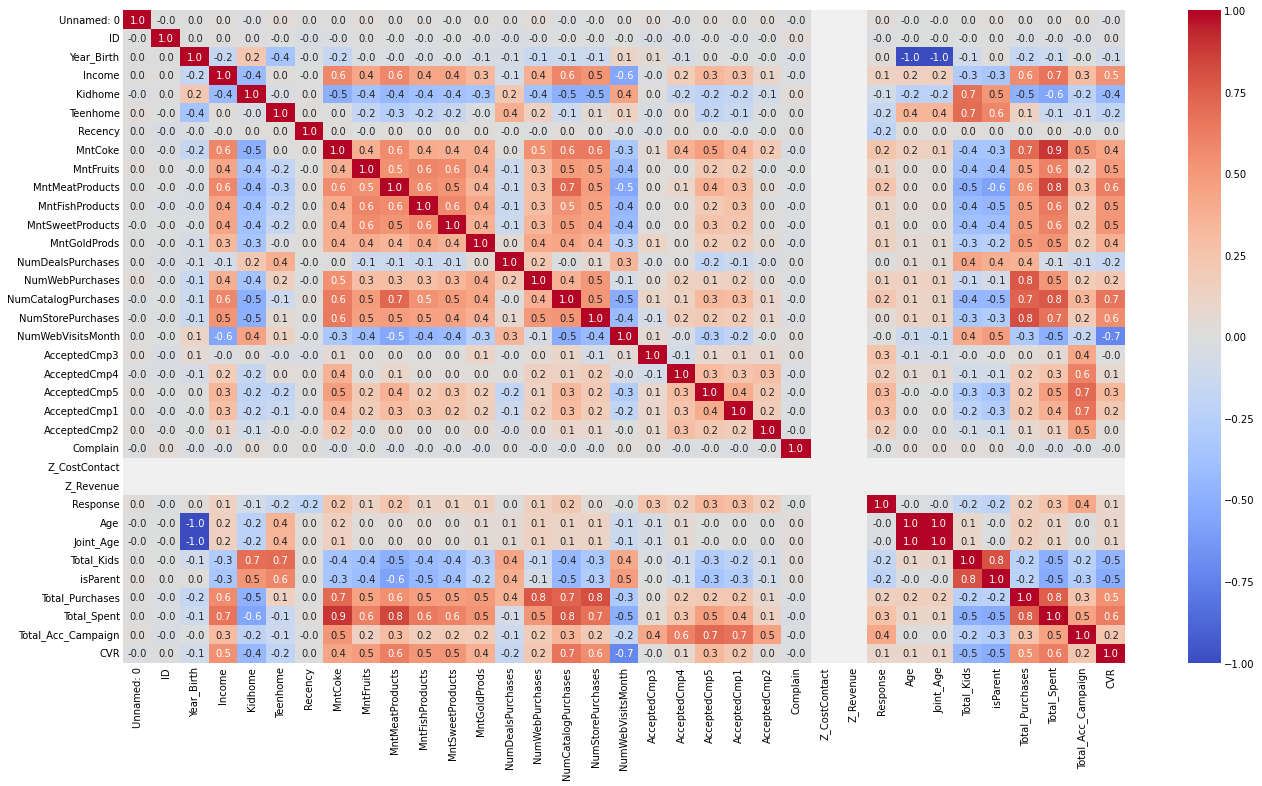

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f')

### Income vs Spending

(0.0, 120000000.0)

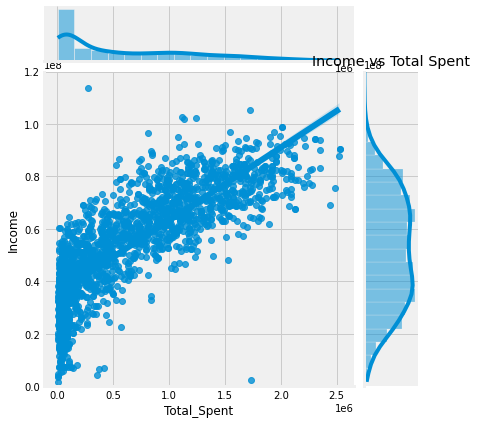

In [ ]:
plot = sns.jointplot(x=df["Total_Spent"], y=df["Income"], kind='reg')
plt.title('Income vs Total Spent')
plot.ax_marg_y.set_ylim(0, 120000000)

### Income vs CVR

(0.0, 120000000.0)

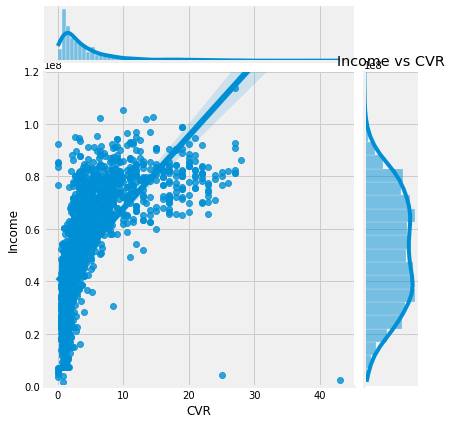

In [ ]:
plot = sns.jointplot(x=df["CVR"], y=df["Income"], kind='reg')
plt.title('Income vs CVR')
plot.ax_marg_y.set_ylim(0, 120000000)

### Spending vs CVR

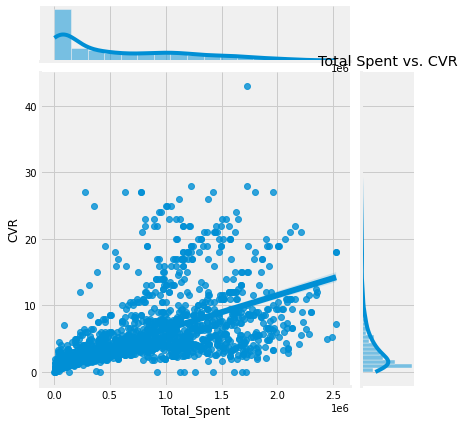

In [ ]:
plot = sns.jointplot(x=df["Total_Spent"], y=df["CVR"], kind='reg')
plt.title('Total Spent vs. CVR')
plt.show()

### Age vs Spending

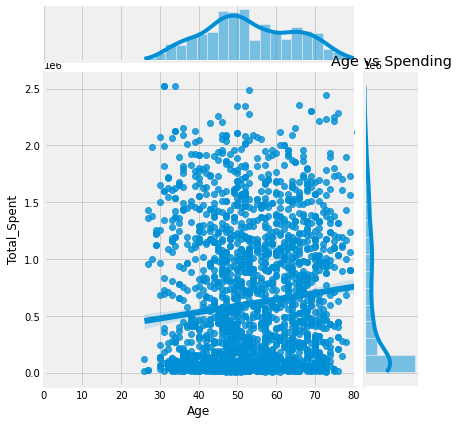

In [ ]:
plot = sns.jointplot(x=df["Age"], y=df["Total_Spent"], kind='reg')
plt.title('Age vs Spending')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

### Age vs Income

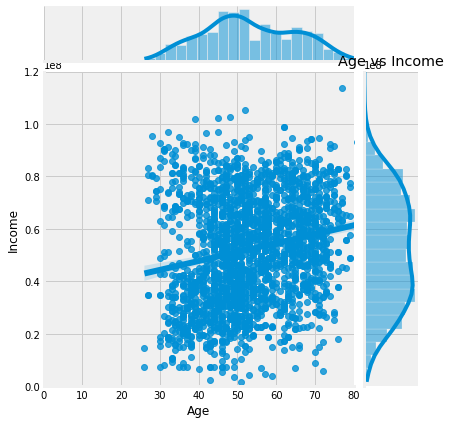

In [ ]:
plot = sns.jointplot(x=df["Age"], y=df["Income"], kind='reg')
plt.title('Age vs Income')
plot.ax_marg_x.set_xlim(0, 80)
plot.ax_marg_y.set_ylim(0, 120000000)
plt.show()

### Age vs CVR

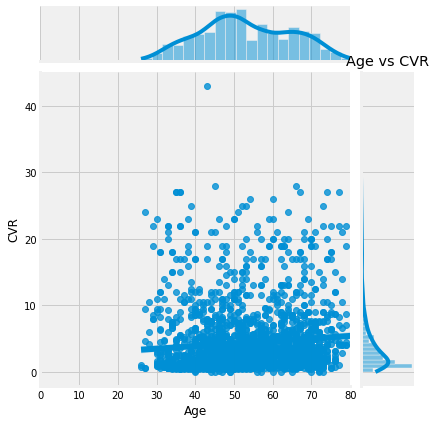

In [ ]:
plot = sns.jointplot(x=df["Age"], y=df["CVR"], kind='reg')
plt.title('Age vs CVR')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

# Data Cleaning & Preprocessing

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Joint_Age', 'Total_Kids', 'isParent', 'Age_Range',
       'Total_Purchases', 'Total_Spent', 'Total_Acc_Campaign', 'CVR'],
      dtype='object')

## Null Values

In [ ]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Joint_Age               0
Total_Kids              0
isParent                0
Age_Range               0
Total_Purchases         0
Total_Spent             0
Total_Acc_Campaign      0
CVR         

we have an null values in the Income column, with a total of 24 rows. Values ​are low ​(1.07%) we can drop the data.

In [ ]:
df = df.dropna()

## Duplicated Rows

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(2216, 39)

## Feature Encoding

In [ ]:
for col in categorical:
    print(f'value counts of column {col}')
    print(df[col].value_counts())
    print('---'*10, '\n')

value counts of column Education
S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: Marital_Status, dtype: int64
------------------------------ 

value counts of column AcceptedCmp1
0    2074
1     142
Name: AcceptedCmp1, dtype: int64
------------------------------ 

value counts of column AcceptedCmp2
0    2186
1      30
Name: AcceptedCmp2, dtype: int64
------------------------------ 

value counts of column AcceptedCmp3
0    2053
1     163
Name: AcceptedCmp3, dtype: int64
------------------------------ 

value counts of column AcceptedCmp4
0    2052
1     164
Name: AcceptedCmp4, dtype: int64
------------------------------ 

value counts of column AcceptedCmp5
0    2054
1     162
Name: AcceptedCmp5, dtype: int64
------------------------------ 

value counts o

In [ ]:
# label encoder
mapping_education = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df['Education_mapped'] = df['Education'].map(mapping_education)

In [ ]:
df_cats = df[['Education']]
# One hot encoder
for cat in ['Marital_Status', 'Age_Range', 'isParent']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df_cats = df_cats.join(onehots)

## Features Standardization

In [ ]:
df_std = df.copy()
ss = StandardScaler()

for col in numerical:
    df_std[col] = ss.fit_transform(df_std[[col]])
    
df_std.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Age,Joint_Age,Total_Kids,isParent,Age_Range,Total_Purchases,Total_Spent,Total_Acc_Campaign,CVR,Education_mapped
0,0,5524,1957,S1,Lajang,0.234063,-0.823039,-0.928972,2012-04-09,0.310532,...,0.986443,0.897752,-1.264803,0,Older_Adults,25,1.675488,0,3.571429,2
1,1,2174,1954,S1,Lajang,-0.234559,1.039938,0.909066,2014-08-03,-0.380509,...,1.236801,1.313688,1.405806,1,Older_Adults,6,-0.962358,0,1.200000,2
2,2,4141,1965,S1,Bertunangan,0.769478,-0.823039,-0.928972,2013-08-21,-0.795134,...,0.318822,0.315443,-1.264803,0,Older_Adults,21,0.280250,0,5.250000,2
3,3,6182,1984,S1,Bertunangan,-1.017239,1.039938,-0.928972,2014-10-02,-0.795134,...,-1.266777,-1.181925,0.070501,1,Middle_Aged_Adults,8,-0.919224,0,1.333333,2
4,4,5324,1981,S3,Menikah,0.240221,1.039938,-0.928972,2014-01-19,1.554407,...,-1.016420,-0.932363,0.070501,1,Middle_Aged_Adults,19,-0.307044,0,3.800000,4


# Modeling

## K-Means Clustering

[104357.21965506373, 77987.73445441775, 61652.36836583122, 55343.156383630136, 50312.12964007013, 46904.70089464342, 43896.02029590342, 41424.98383228289, 40017.362973949756, 38809.05267700291, 37629.417075887555, 36804.63151040448, 35881.145593858724, 35182.219068302846, 34450.105204043604, 33813.88775651713, 33257.33901476104, 32662.890141160482]


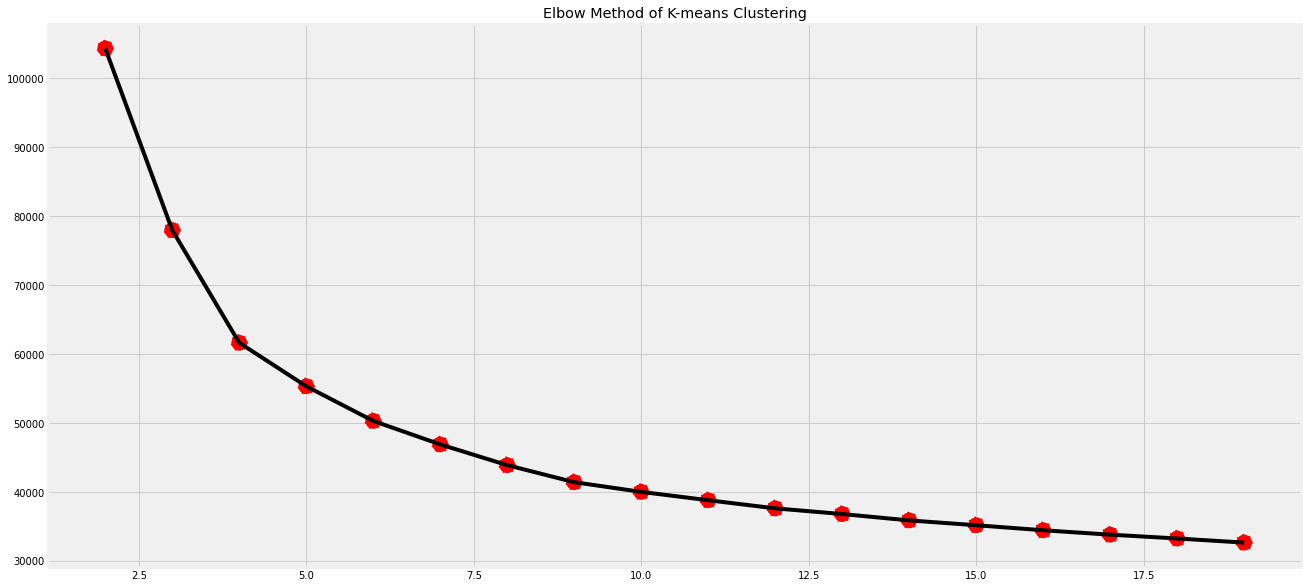

In [ ]:
from sklearn.cluster import KMeans
X = df_std.drop(columns=['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Age_Range', 'Dt_Customer']).copy()
# X = dataset_scaled[numerical_features].copy()
inertia = []

for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-means Clustering')
# plt.plot(inertia)

sns.lineplot(x=range(2, 20), y=inertia, color='black', linewidth = 4)
sns.scatterplot(x=range(2, 20), y=inertia, s=300, color='red',  linestyle='--')

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

In [ ]:
X.tail()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Age,Joint_Age,Total_Kids,isParent,Total_Purchases,Total_Spent,Total_Acc_Campaign,CVR,Education_mapped,cluster
2235,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,...,0.151917,0.149069,0.070501,1,18,1.217598,0,3.600000,2,0
2236,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,...,1.904422,1.979184,2.741110,1,22,-0.270546,1,3.142857,4,2
2237,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,...,-1.016420,-0.932363,-1.264803,0,19,1.051696,1,3.166667,2,0
2238,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,...,1.069896,1.147313,0.070501,1,23,0.391404,0,7.666667,3,2
2239,0.024705,1.039938,0.909066,-0.311405,-0.655568,-0.587058,-0.472705,-0.651038,-0.633880,-0.443313,...,1.236801,1.147313,1.405806,1,11,-0.721800,0,1.571429,4,1


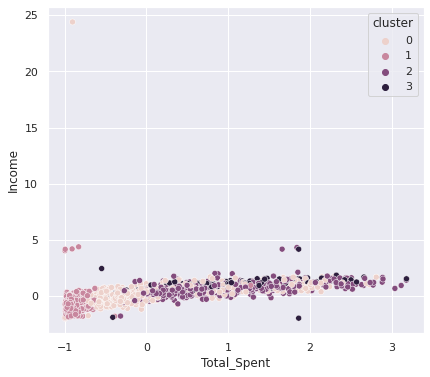

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.scatterplot(data=X, x='Total_Spent', y='Income', hue='cluster')

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

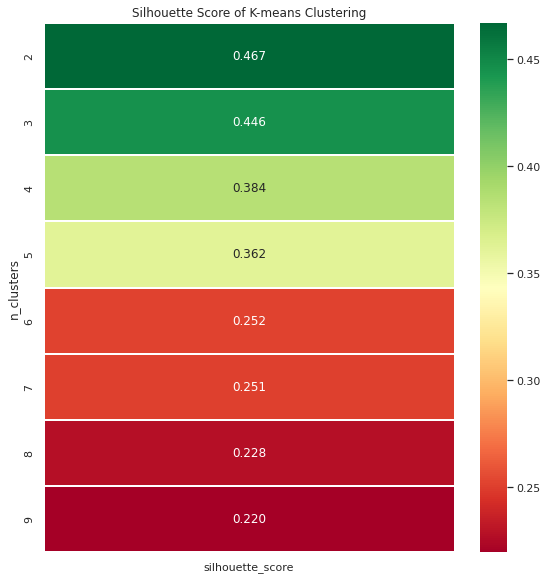

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
visualize_silhouette_layer(X)

# Customer personality analysis for marketing retargeting

## Cluster Analysis

In [ ]:
numerical

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Z_CostContact',
 'Z_Revenue',
 'Age',
 'Joint_Age',
 'Total_Kids',
 'Total_Spent']

In [ ]:
df[numerical+['cluster']].groupby('cluster')['Income','Total_Spent'].describe()

Income                                                                 \
         count          mean           std        min         25%         50%   
cluster                                                                         
0        600.0  5.915598e+07  2.907067e+07  1730000.0  47159000.0  57313000.0   
1        915.0  3.376977e+07  1.430822e+07  3502000.0  24736500.0  33402000.0   
2        564.0  6.846531e+07  1.320797e+07  7144000.0  60407500.0  68117500.0   
3        137.0  7.863174e+07  1.416946e+07  2447000.0  72679000.0  80124000.0   

                                 Total_Spent                               \
                75%          max       count          mean            std   
cluster                                                                     
0        68722500.0  666666000.0       600.0  7.172950e+05  493792.719730   
1        41020500.0  162397000.0       915.0  7.612787e+04   71647.141976   
2        76738500.0  160803000.0       564.0  1.185512e+06  444518.680991   
3        83829000.0  157146000.0       137.0  1.289168e+06  432624.303275   

                                                              
              min       25%        50%        75%        max  
cluster                                                       
0          8000.0  346000.0   506000.0  1035250.0  2302000.0  
1          5000.0   36000.0    57000.0    96000.0  1376000.0  
2        415000.0  833500.0  1110500.0  1486250.0  2524000.0  
3        277000.0  988000.0  1216000.0  1574000.0  2525000.0

In [ ]:
df.groupby('cluster')['Age','Total_Kids'].describe()

Age                                                       \
         count       mean        std   min   25%   50%   75%    max   
cluster                                                               
0        600.0  54.870000  11.464969  28.0  47.0  54.0  64.0   79.0   
1        915.0  50.444809  11.494455  26.0  43.0  49.0  57.0  129.0   
2        564.0  55.303191  11.582828  27.0  47.0  55.0  65.0   81.0   
3        137.0  55.299270  15.206116  27.0  43.0  56.0  67.0  123.0   

        Total_Kids                                               
             count      mean       std  min  25%  50%  75%  max  
cluster                                                          
0            600.0  0.901667  0.720784  0.0  0.0  1.0  1.0  3.0  
1            915.0  1.232787  0.702774  0.0  1.0  1.0  2.0  3.0  
2            564.0  0.746454  0.688323  0.0  0.0  1.0  1.0  3.0  
3            137.0  0.065693  0.248655  0.0  0.0  0.0  0.0  1.0

In [ ]:
df.groupby('cluster')['NumWebVisitsMonth','NumWebPurchases'].describe()

NumWebVisitsMonth                                                \
                    count      mean       std  min  25%  50%  75%   max   
cluster                                                                   
0                   600.0  5.285000  2.415955  0.0  3.0  5.0  7.0  20.0   
1                   915.0  6.431694  1.870092  0.0  5.0  7.0  8.0  20.0   
2                   564.0  4.599291  2.045417  0.0  3.0  4.0  6.0   9.0   
3                   137.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0   

        NumWebPurchases                                                
                  count      mean       std  min  25%  50%  75%   max  
cluster                                                                
0                 600.0  4.998333  1.850415  0.0  4.0  5.0  6.0  11.0  
1                 915.0  1.851366  1.005339  0.0  1.0  2.0  2.0   6.0  
2                 564.0  6.851064  2.348610  0.0  5.0  7.0  8.0  23.0  
3                 137.0  3.620438  2.908232  0.0  3.0  3.0  4.0  27.0

In [ ]:
map_cluster = {
    0 : 'Low Spender',
    1 : 'Risk of Churn',
    2 : 'Mid Spender',
    3 : 'High Spender'
}

df['cluster_mapped'] = df['cluster'].map(map_cluster)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

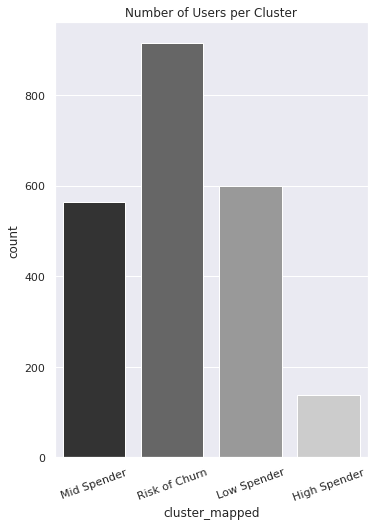

In [ ]:
sns.set(rc={'figure.figsize':(5,8)})
sns.countplot(x=df['cluster_mapped'], palette='gray')
plt.title('Number of Users per Cluster')
plt.xticks(rotation=20)

(0.0, 120000000.0)

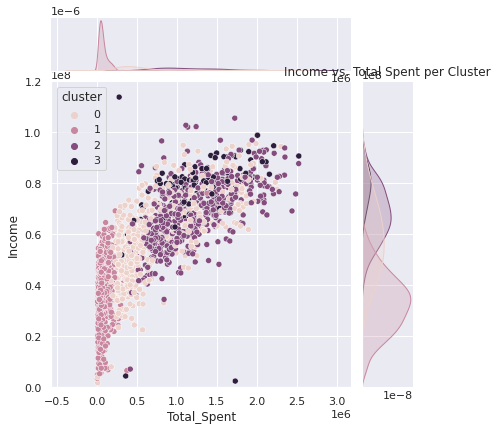

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
plot = sns.jointplot(x=df["Total_Spent"], y=df["Income"], hue=df["cluster"])
plt.title('Income vs. Total Spent per Cluster')
plot.ax_marg_y.set_ylim(0, 120000000)

### Total Income per Cluster

(0.0, 120000000.0)

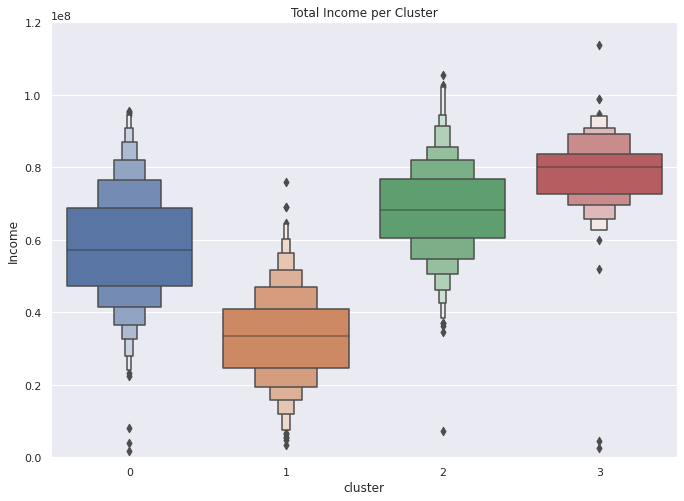

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxenplot(x=df['cluster'], y=df['Income'])
plt.title('Total Income per Cluster')
plt.ylim(0, 120000000)

### Total Spending per Cluster

Text(0.5, 1.0, 'Total Amount Spent per Cluster')

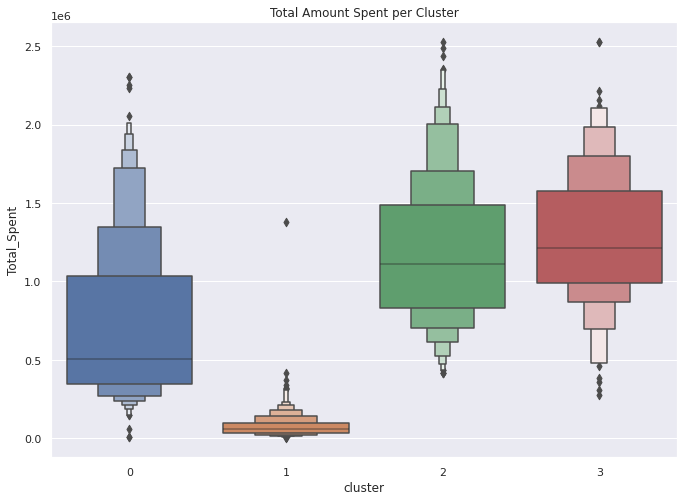

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxenplot(x=df['cluster'], y=df['Total_Spent'])
plt.title('Total Amount Spent per Cluster')

### Total Visits per Cluster

Text(0.5, 1.0, 'Total Visit Web per Cluster')

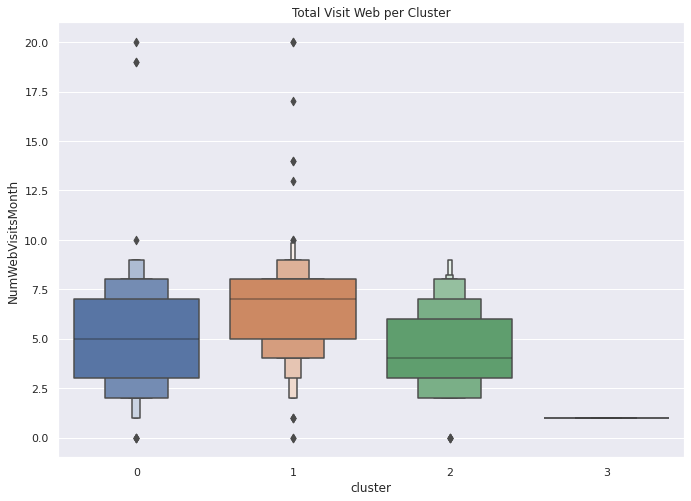

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxenplot(x=df['cluster'], y=df['NumWebVisitsMonth'])
plt.title('Total Visit Web per Cluster')

### Total Purchases per Cluster

Text(0.5, 1.0, 'Total Puchases per Cluster')

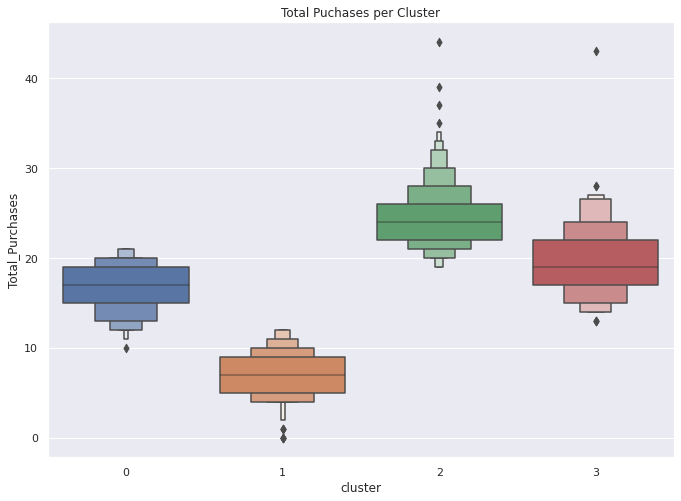

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxenplot(x=df['cluster'], y=df['Total_Purchases'])
plt.title('Total Puchases per Cluster')

### Total Accepted Campaign per Cluster

Text(0.5, 1.0, 'Total Accepter Campaign per Cluster')

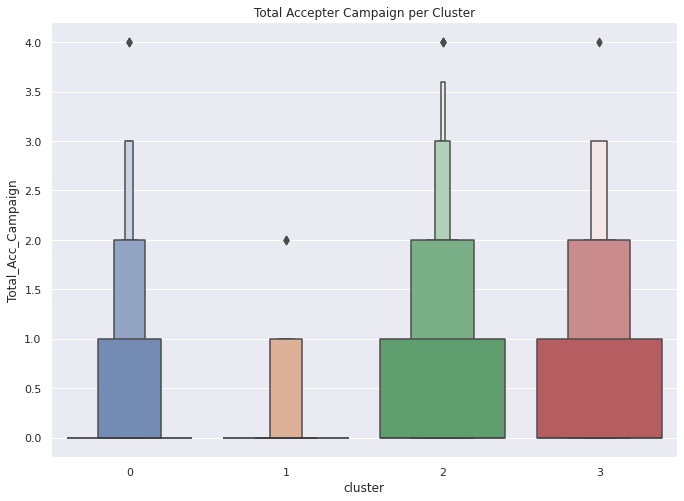

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxenplot(x=df['cluster'], y=df['Total_Acc_Campaign'])
plt.title('Total Accepter Campaign per Cluster')

### Conversion per Cluster

Text(0.5, 1.0, 'CVR per Cluster')

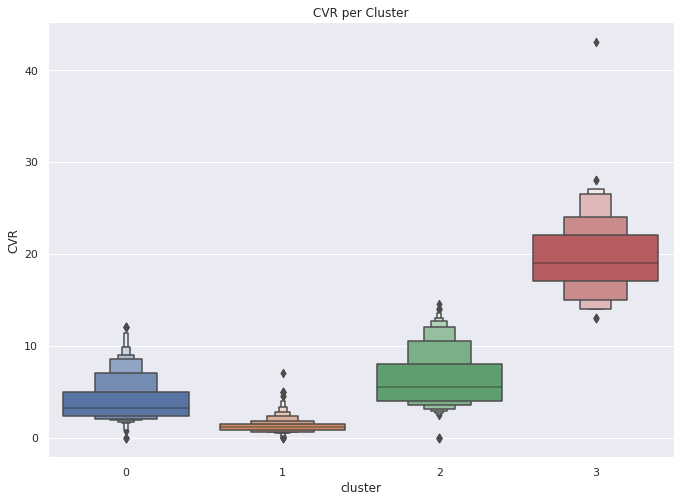

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxenplot(x=df['cluster'], y=df['CVR'])
plt.title('CVR per Cluster')

## Interpretation Cluster

1. Low Spender
* This group numbered 600 people.
* This group is dominated by age 54 (Middle_Aged_Adult) with 1-3 children.
* This group has a salary of around 57 million/year (median) and spending 506k/year (median).
* This group made 5 (median) web visits with 5 (median) purchases through the platform.

2. Risk of Churn
* This group numbered 915 people.
* This group is dominated by age 50 (Middle_Aged_Adults) with 1-3 children.
* This group has a salary of around 33 million (median) and a spending of 57k/year.
* This group made 7 (median) web visits with 2 (median) purchases through the platform.

3. Mid-Spender
* This group numbered 564 people.
* This group is dominated by age 55 (Older_Adults) with 1-3 children.
* This group has a salary of around 68 million/year (median) and spending of 1.1 million/year.
* This group made 4 (median) web visits with 7 (median) purchases through the platform.

4. High Spender
* This group numbered 137 people.
* This group is dominated by the age of 56 (Older_Adults) with the number of children 0-1
* This group has a salary of around 80 million/year (median) and spending of 1.2 million/year.
* This group made 1 (median) web visit with 3 (median) purchases through the platform.

## Business Recomendation

Recommendations:

1. Continue to provide excellent service for the Mid Spender and High Spender groups so as not to churn.
2. For the Mid Spender and High Spender groups, further analysis can be carried out on how to increase transactions through the platform, because by looking at the amount of income per year which is quite large, but only makes transactions in the range of 1 million. Companies can provide more personalized recommendations, as well as deeper analysis of how to optimize promotions in this segment and keep shopping on our platform.
3. For the Low Spender and Risk to Churn groups, further analysis can also be carried out on how to increase the visit to transaction conversion ratio. They have a fairly high number of visits but do not make transactions.

Potential Impacts:

* If we are able to maximize transactions in the Low Spender group, we will get a potential income of IDR 430 million.
* If we are able to maximize transactions in the Mid Spender group, we will get a potential income of IDR 668 million.
* If we are able to maximize transactions in the High Spender group, we will get a potential income of IDR 176 million.

In [ ]:
# Total Spet Cluster 3
df[df['cluster'] == 3].Total_Spent.sum()

176616000

In [ ]:
# Total Spent Cluster 2
df[df['cluster'] == 2].Total_Spent.sum()

668629000

In [ ]:
# Average Spent CLuster 3 per Transaction
df[df['cluster'] == 3].Total_Spent.sum() / df[df['cluster'] == 3].Total_Purchases.sum()

66372.04058624577

In [ ]:
# Average Spent Cluster 2 per Transaction
df[df['cluster'] == 2].Total_Spent.sum() / df[df['cluster'] == 2].Total_Purchases.sum()

48304.363531281604

In [ ]:
# Total Spet Cluster 0
df[df['cluster'] == 0].Total_Spent.sum()

430377000

In [ ]:
# Average Spent Cluster 0 per Transaction
df[df['cluster'] == 0].Total_Spent.sum() / df[df['cluster'] == 0].Total_Purchases.sum()

43175.86276083467